<a href="https://colab.research.google.com/github/yk-Jeong/KNOU/blob/main/%EB%8B%A4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D_7%EA%B0%95_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
beer = pd.read_csv('/content/beerbrand.csv', index_col='name')
beer.head()

,calories,sodium,alcohol,cost
name,,,,
BUDWEISER,144,15,4.7,0.43
SCHLITZ,151,19,4.9,0.43
LOWENBRAU,157,15,4.9,0.48
KRONENBOURG,170,7,5.2,0.73
HEINEKEN,152,11,5.0,0.77


In [4]:
# 기술통계량 확인

beer.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.400000,14.950000,4.440000,0.496500
std,30.257491,6.581273,0.759778,0.143757
min,68.000000,6.000000,2.300000,0.280000
25%,110.250000,9.500000,4.200000,0.430000
50%,144.000000,15.000000,4.650000,0.440000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [5]:
# 표준화

from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler().fit_transform

In [14]:
zbeer = scaler(beer)
zbeer

array([[ 0.39333561,  0.00779468,  0.35109498, -0.47460365],
       [ 0.63069331,  0.63136906,  0.62116805, -0.47460365],
       [ 0.83414276,  0.00779468,  0.62116805, -0.1177588 ],
       [ 1.27494991, -1.23935408,  1.02627765,  1.66646546],
       [ 0.66460155, -0.6157797 ,  0.75620458,  1.95194134],
       [ 0.42724385,  1.25494344,  0.21605845, -1.54513821],
       [ 1.44449112,  1.41083704,  1.43138724, -0.68871056],
       [ 0.56287682,  1.87851782,  0.35109498, -0.54597262],
       [-1.13253529, -0.7716733 , -0.18905115, -0.47460365],
       [-0.6578199 , -1.08346049, -0.99927034, -0.40323468],
       [ 0.25770264,  0.47547547,  0.21605845, -0.40323468],
       [-1.03081057,  0.00779468, -0.45912421, -0.26049674],
       [ 0.08816143, -0.6157797 , -0.32408768,  0.02497914],
       [ 0.59678506,  0.63136906,  0.35109498,  1.88057237],
       [ 0.56287682, -1.39524768,  0.75620458,  2.09467928],
       [-2.1836908 ,  0.00779468, -2.88978179, -0.83144851],
       [ 0.12206967,  0.

In [15]:
zbeer_frame = pd.DataFrame(zbeer)

In [16]:
zbeer_frame.columns = beer.columns
zbeer_frame.describe()

,calories,sodium,alcohol,cost
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-1.554312e-16,7.771561e-17,-1.634803e-15,-3.747003e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.183691e+00,-1.395248e+00,-2.889782e+00,-1.545138e+00
25%,-7.510676e-01,-8.496201e-01,-3.240877e-01,-4.746037e-01
50%,3.933356e-01,7.794680e-03,2.835767e-01,-4.032347e-01
75%,6.052621e-01,6.313691e-01,6.211680e-01,-8.207432e-02
max,1.444491e+00,1.878518e+00,1.431387e+00,2.094679e+00


#### 최단연결법

In [17]:
import scipy.cluster.hierarchy as sch

In [19]:
slink = sch.linkage

In [21]:
zbeer_slink = slink(zbeer, 'single')
# single: 최단, ward: 와드, complete: 완전, average: , median, centroid: 중심
zbeer_slink

array([[10.        , 16.        ,  0.34746526,  2.        ],
       [ 0.        , 20.        ,  0.51034304,  3.        ],
       [ 8.        , 19.        ,  0.56837992,  2.        ],
       [ 7.        , 17.        ,  0.57052829,  2.        ],
       [ 1.        , 21.        ,  0.57674272,  4.        ],
       [ 2.        , 24.        ,  0.62816292,  5.        ],
       [ 4.        , 14.        ,  0.79893202,  2.        ],
       [23.        , 25.        ,  0.81480611,  7.        ],
       [11.        , 22.        ,  0.85831199,  3.        ],
       [ 3.        , 26.        ,  0.88750067,  3.        ],
       [ 9.        , 28.        ,  0.90573564,  4.        ],
       [12.        , 27.        ,  1.08969302,  8.        ],
       [ 5.        , 31.        ,  1.15568621,  9.        ],
       [30.        , 32.        ,  1.18930743, 13.        ],
       [13.        , 29.        ,  1.31498533,  4.        ],
       [ 6.        , 33.        ,  1.34433062, 14.        ],
       [15.        , 18.

Text(0.5, 1.0, 'Dendrogram of Single ')

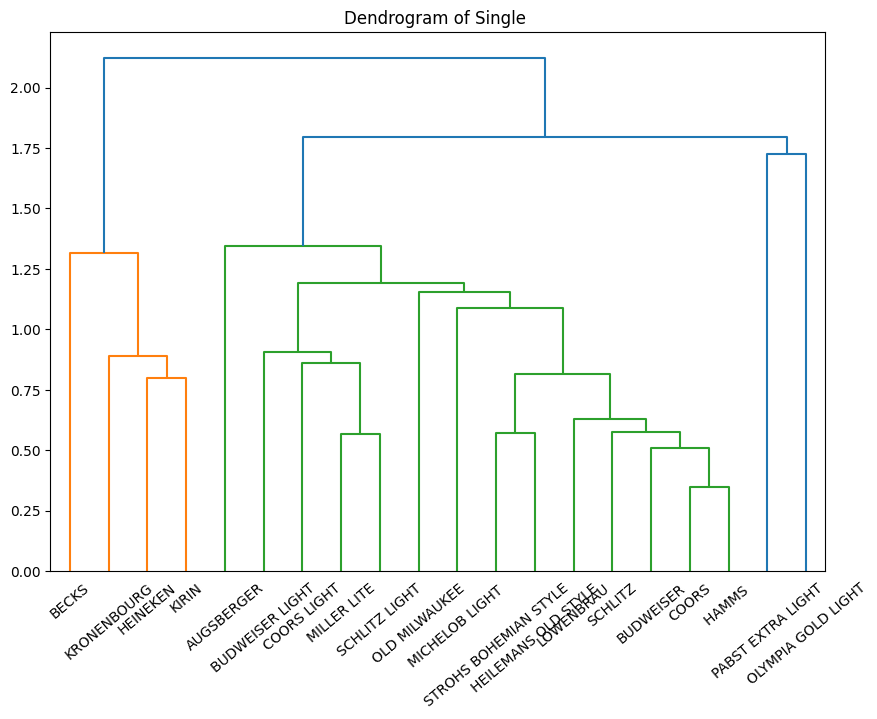

In [25]:
# 최단연결법 그래픽

plt.figure(figsize=(10, 7))
sch.dendrogram(zbeer_slink,
               leaf_rotation=40, 
               leaf_font_size=10,
               labels=beer.index)
plt.title('Dendrogram of Single ')

In [29]:
# 소속 군집 알기

from sklearn.cluster import AgglomerativeClustering
wcluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
member = wcluster.fit_predict(zbeer)
member

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 2, 2, 0, 0, 0, 3, 3, 0, 3, 3, 2, 2, 1, 0, 0, 1, 3])

In [30]:
# 군집별 평균 계산

member1 = pd.DataFrame(member, columns=['cluster'], index=beer.index)
data_combined=beer.join(member1)
data_combined.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,149.00,20.444444,4.800,0.415556
1,70.00,10.500000,2.600,0.420000
2,155.25,10.750000,4.975,0.762500
3,109.20,10.200000,4.100,0.460000


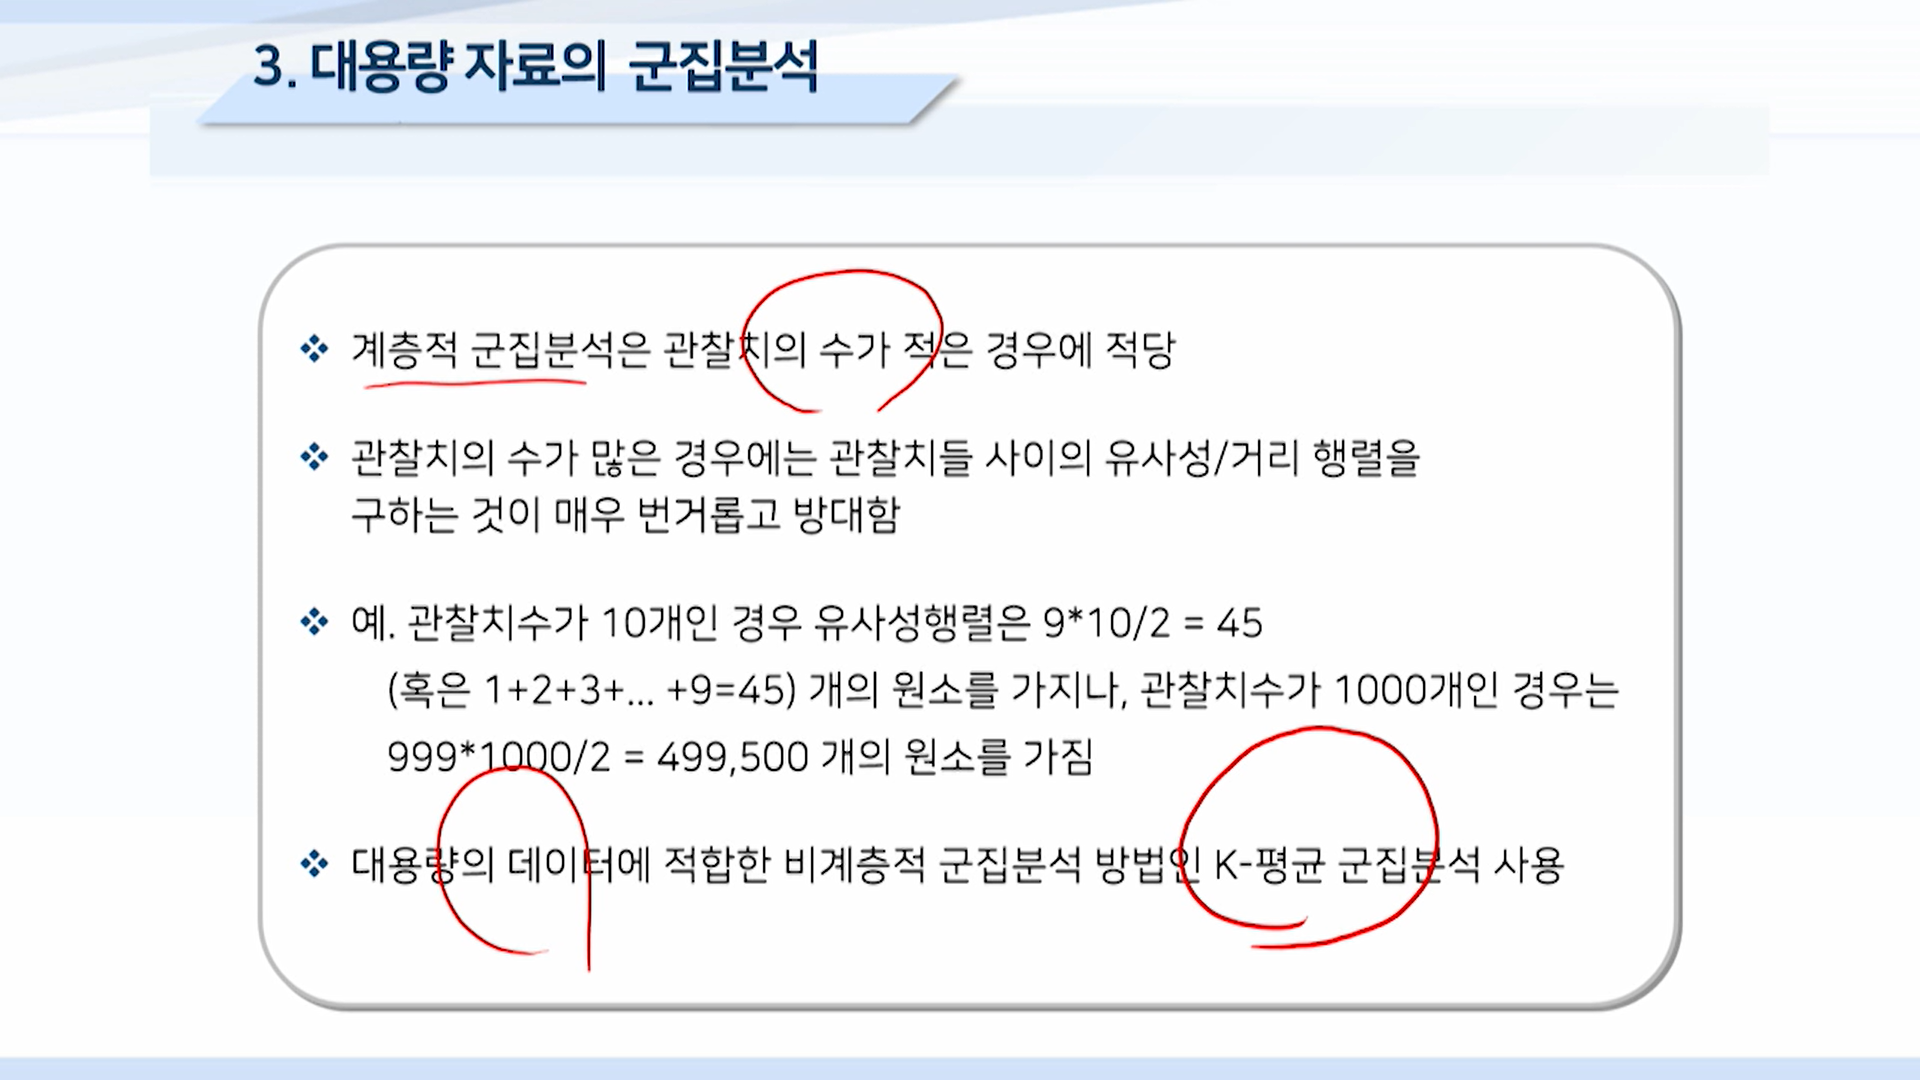

In [32]:
# k-means 군집분석

from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=2)
kmc.fit(zbeer)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [33]:
# 군집 중심 알기

kmc.cluster_centers_

array([[ 0.58951901,  0.31958187,  0.49577698,  0.17281486],
       [-1.37554436, -0.74569103, -1.15681296, -0.40323468]])

In [34]:
# 소속 군집 알기

kmc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=int32)

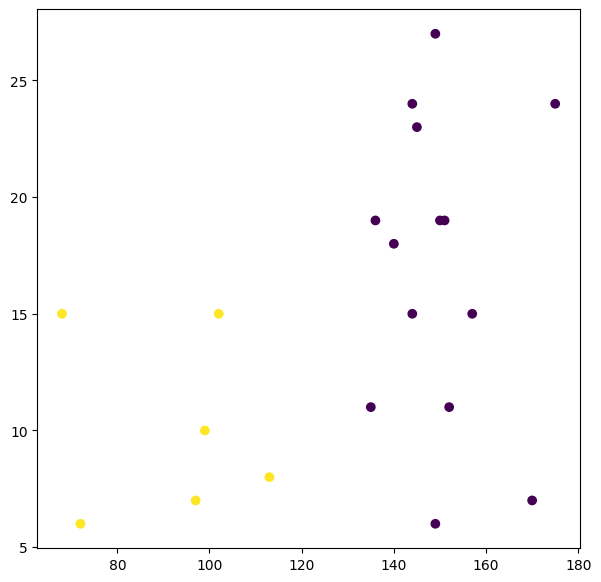

In [35]:
# 산점도 

plt.figure(figsize=(7, 7))
plt.scatter(x=beer['calories'], y=beer['sodium'], c=kmc.labels_)
plt.show()